Cleaning this copy before downloading and working on streamlet and slides

In [ ]:
# load relevant libraries
import numpy as np
import pandas as pd
#
import pydotplus

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  

# tried dividing num_descriptors by 30 to try and normalize the 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:


# Use inline so our visualizations display in notebook
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 


# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 

Need to load the file manually from the computer each time

By uploading to session storage

Manually combined the 2 csvs with the data

Inspecting the data

In [ ]:
df = pd.read_csv("video_games_esrb_rating.csv")

In [ ]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [ ]:
df.shape

(2395, 34)

In [ ]:
df.describe(include="all")

# not very useful since most data is boolean

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
count,2395,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000,2395
unique,2332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Night Trap - 25th Anniversary Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,873
mean,NaN,0.479332,0.050522,0.008351,0.231315,0.127349,0.020042,0.051357,0.034238,0.230063,...,0.031315,0.047599,0.057620,0.104384,0.038831,0.108977,0.03048,0.022965,0.114823,NaN
std,NaN,0.499677,0.219065,0.091019,0.421762,0.333433,0.140172,0.220771,0.181878,0.420961,...,0.174205,0.212961,0.233072,0.305822,0.193232,0.311675,0.17194,0.149822,0.318874,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN


In [ ]:
df.info()

# we can see that one column has a spelling mistake

# could change the data types of the features but it is fine the way it is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2395 non-null   object
 1   console                   2395 non-null   int64 
 2   alcohol_reference         2395 non-null   int64 
 3   animated_blood            2395 non-null   int64 
 4   blood                     2395 non-null   int64 
 5   blood_and_gore            2395 non-null   int64 
 6   cartoon_violence          2395 non-null   int64 
 7   crude_humor               2395 non-null   int64 
 8   drug_reference            2395 non-null   int64 
 9   fantasy_violence          2395 non-null   int64 
 10  intense_violence          2395 non-null   int64 
 11  language                  2395 non-null   int64 
 12  lyrics                    2395 non-null   int64 
 13  mature_humor              2395 non-null   int64 
 14  mild_blood              

In [ ]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [ ]:
df["strong_language"] = df["strong_janguage"]

In [ ]:
df.drop("strong_janguage", axis=1, inplace=True)
# dropping the wrongly spelled one

In [ ]:
df.drop("console", axis=1, inplace=True)

# dropping console because it is not a useful feature

In [ ]:
column_names = list(df.columns)

In [ ]:
df.isnull().sum().sum()

# no nulls

0

In [ ]:
df.duplicated().sum()

# we have 33 duplicate rows that we need to remove

33

In [ ]:
print(df.shape)

df = df.drop_duplicates()

print(df.shape)

(2395, 33)
(2362, 33)


In [ ]:
df.duplicated().sum()

# duplicates removed

0

In [ ]:
df.esrb_rating.value_counts()

# we can see that most of our games are T and the least are M

# we have almost twice the number of T games than we do the rest so we
# may want to artifically balance the data to use
# 476 of each category

T     866
ET    516
E     504
M     476
Name: esrb_rating, dtype: int64

In [ ]:
df.title.value_counts().value_counts()

# we can see that we have 30 games with the same name
# this is due to remasters of the same game
# some have a different rating or descriptor due to change in views
# over time
# unfortunately we do not have a year so we cannot look at how
# a games rating may change with time

1    2302
2      30
Name: title, dtype: int64

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

# this shows us the breakdown of each descriptor

title
Night Trap - 25th Anniversary Edition          2
Jak II                                         2
Serial Cleaner                                 2
BUTCHER                                        2
What Remains of Edith Finch                    2
                                              ..
The Legend of Heroes: Trails of Cold Steel     1
Lichtspeer                                     1
Mantis Burn Racing                             1
Legendary Eleven                               1
Crypt of the Serpent King                      1
Name: title, Length: 2332, dtype: int64
***********************
alcohol_reference
0    2243
1     119
Name: alcohol_reference, dtype: int64
***********************
animated_blood
0    2342
1      20
Name: animated_blood, dtype: int64
***********************
blood
0    1812
1     550
Name: blood, dtype: int64
***********************
blood_and_gore
0    2058
1     304
Name: blood_and_gore, dtype: int64
***********************
cartoon_violence
0    2314


There is a descriptor called no descriptor so let us look at what ratings these games have

In [ ]:
df[df["no_descriptors"] == 1].esrb_rating.value_counts()

E     310
T      42
ET     16
M       4
Name: esrb_rating, dtype: int64

There are 372 games that have a label called no descriptor

They seem to be mostly E so let us check if
these games actually have no descriptors
As it seems odd that a game with no descriptors would get an M rating
let us investigate these M games with no descriptors

In [ ]:
test_df = df[df["esrb_rating"] == "M"]

In [ ]:
test_df = test_df[test_df["no_descriptors"] == 1]

In [ ]:
test_df

# looking at this data we can see right away that
# even though these games are supposed to have no descriptors they have blood

# we could also check the rest but I belive it will hold

# so we will count up the number of descriptors
# and fix it

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language
260,Maneater,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,M,0
626,Observation,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,1
682,Tharsis,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,1
1387,Frostpunk,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,1


In [ ]:
df["num_descriptors"] = 999

# just making a placeholder

list_descriptors = list(df.columns)
list_descriptors.remove("title")

list_descriptors.remove("esrb_rating")
list_descriptors.remove("no_descriptors")
list_descriptors.remove("num_descriptors")

df["num_descriptors"] = df[list_descriptors].sum(axis=1)

df["num_descriptors"] = df["num_descriptors"]/30

df.head(10)



,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.000000
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,ET,0,0.100000
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,M,1,0.100000
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,ET,0,0.100000
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,T,0,0.100000
5,Monster Energy Supercross - The Official Video...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.000000
6,Monochrome Order,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,T,0,0.100000
7,Blightbound,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,0.066667
8,Maquette,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ET,0,0.066667
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,T,0,0.033333


In [ ]:
df['num_descriptors'].value_counts()

# after summing up the columns we see that there are 325 games without descriptors 

#As opposed to 371  we started with that actually had descriptors

0.033333    694
0.066667    593
0.100000    395
0.000000    325
0.133333    235
0.166667    103
0.200000     17
Name: num_descriptors, dtype: int64

In [ ]:
df[df["num_descriptors"] == 0].esrb_rating.value_counts()

# we can see that all the games with no_descriptor are rated E except for 1

# what is this game

E     324
ET      1
Name: esrb_rating, dtype: int64

In [ ]:
test_df = df[df["esrb_rating"] == "ET"]

In [ ]:
test_df = test_df[test_df["num_descriptors"] == 0]

In [ ]:
test_df

# we can see this ET game is an architect game

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors
900,Project Highrise - Architect's Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ET,0,0.0


In [ ]:
df[df["num_descriptors"] == 0].no_descriptors.value_counts()

# Also we can see that there are 19 games that have no descriptors
# but are not given the no_descriptor value

# we should fix this by changing the data

# but out of cursosity let us examine them

1    307
0     18
Name: no_descriptors, dtype: int64

In [ ]:
test_df = df[df["num_descriptors"] == 0]

In [ ]:
test_df = test_df[test_df["no_descriptors"] == 0]

# propbably should use conditionals to do this in a cleaner way

In [ ]:
test_df

# they seem to be fine games and none stand out
# I wonder why they were mislabled

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors
208,Race with Ryan Road Trip Deluxe Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
322,Cooking Mama: Cookstar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
408,Garfield Kart: Furious Racing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
430,Race with Ryan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
536,Harvest Moon: Mad Dash,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
543,The Angry Birds Movie 2 VR: Under Pressure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
639,Everybody's Golf VR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
900,Project Highrise - Architect's Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ET,0,0.0
927,The Golf Club 2019 Featuring the PGA Tour,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0
1265,Old Man's Journey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,0,0.0


In [ ]:
df["no_descriptors"]= np.where((df["num_descriptors"] == 0), 1, 0)

In [ ]:
df[df["num_descriptors"] == 0].no_descriptors.value_counts()

1    325
Name: no_descriptors, dtype: int64

In [ ]:
df[df["no_descriptors"] == 1].num_descriptors.value_counts()

0.0    325
Name: num_descriptors, dtype: int64

Sanity checks so we can see that all games with no descriptors
have a num of 0
and all games with a num of 0 have 
no descriptor

In [ ]:
df[df["no_descriptors"] == 1].esrb_rating.value_counts()

# now these are the actual games with no descriptors

E     324
ET      1
Name: esrb_rating, dtype: int64

Now I am going to encode the esrb ratings so we can
make a correlation map

In [ ]:
encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

In [ ]:
df["esrb_encoded"] = df["esrb_rating"].map(encode)





In [ ]:
df.info()

# need to change they data type of esrb_encoded to numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     2362 non-null   object 
 1   alcohol_reference         2362 non-null   int64  
 2   animated_blood            2362 non-null   int64  
 3   blood                     2362 non-null   int64  
 4   blood_and_gore            2362 non-null   int64  
 5   cartoon_violence          2362 non-null   int64  
 6   crude_humor               2362 non-null   int64  
 7   drug_reference            2362 non-null   int64  
 8   fantasy_violence          2362 non-null   int64  
 9   intense_violence          2362 non-null   int64  
 10  language                  2362 non-null   int64  
 11  lyrics                    2362 non-null   int64  
 12  mature_humor              2362 non-null   int64  
 13  mild_blood                2362 non-null   int64  
 14  mild_car

In [ ]:
df.head()
# sanity check

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors,esrb_encoded
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,0,0.0,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,ET,0,0.1,1
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,M,1,0.1,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,ET,0,0.1,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,T,0,0.1,2


In [ ]:
df.esrb_rating.value_counts()

T     866
ET    516
E     504
M     476
Name: esrb_rating, dtype: int64

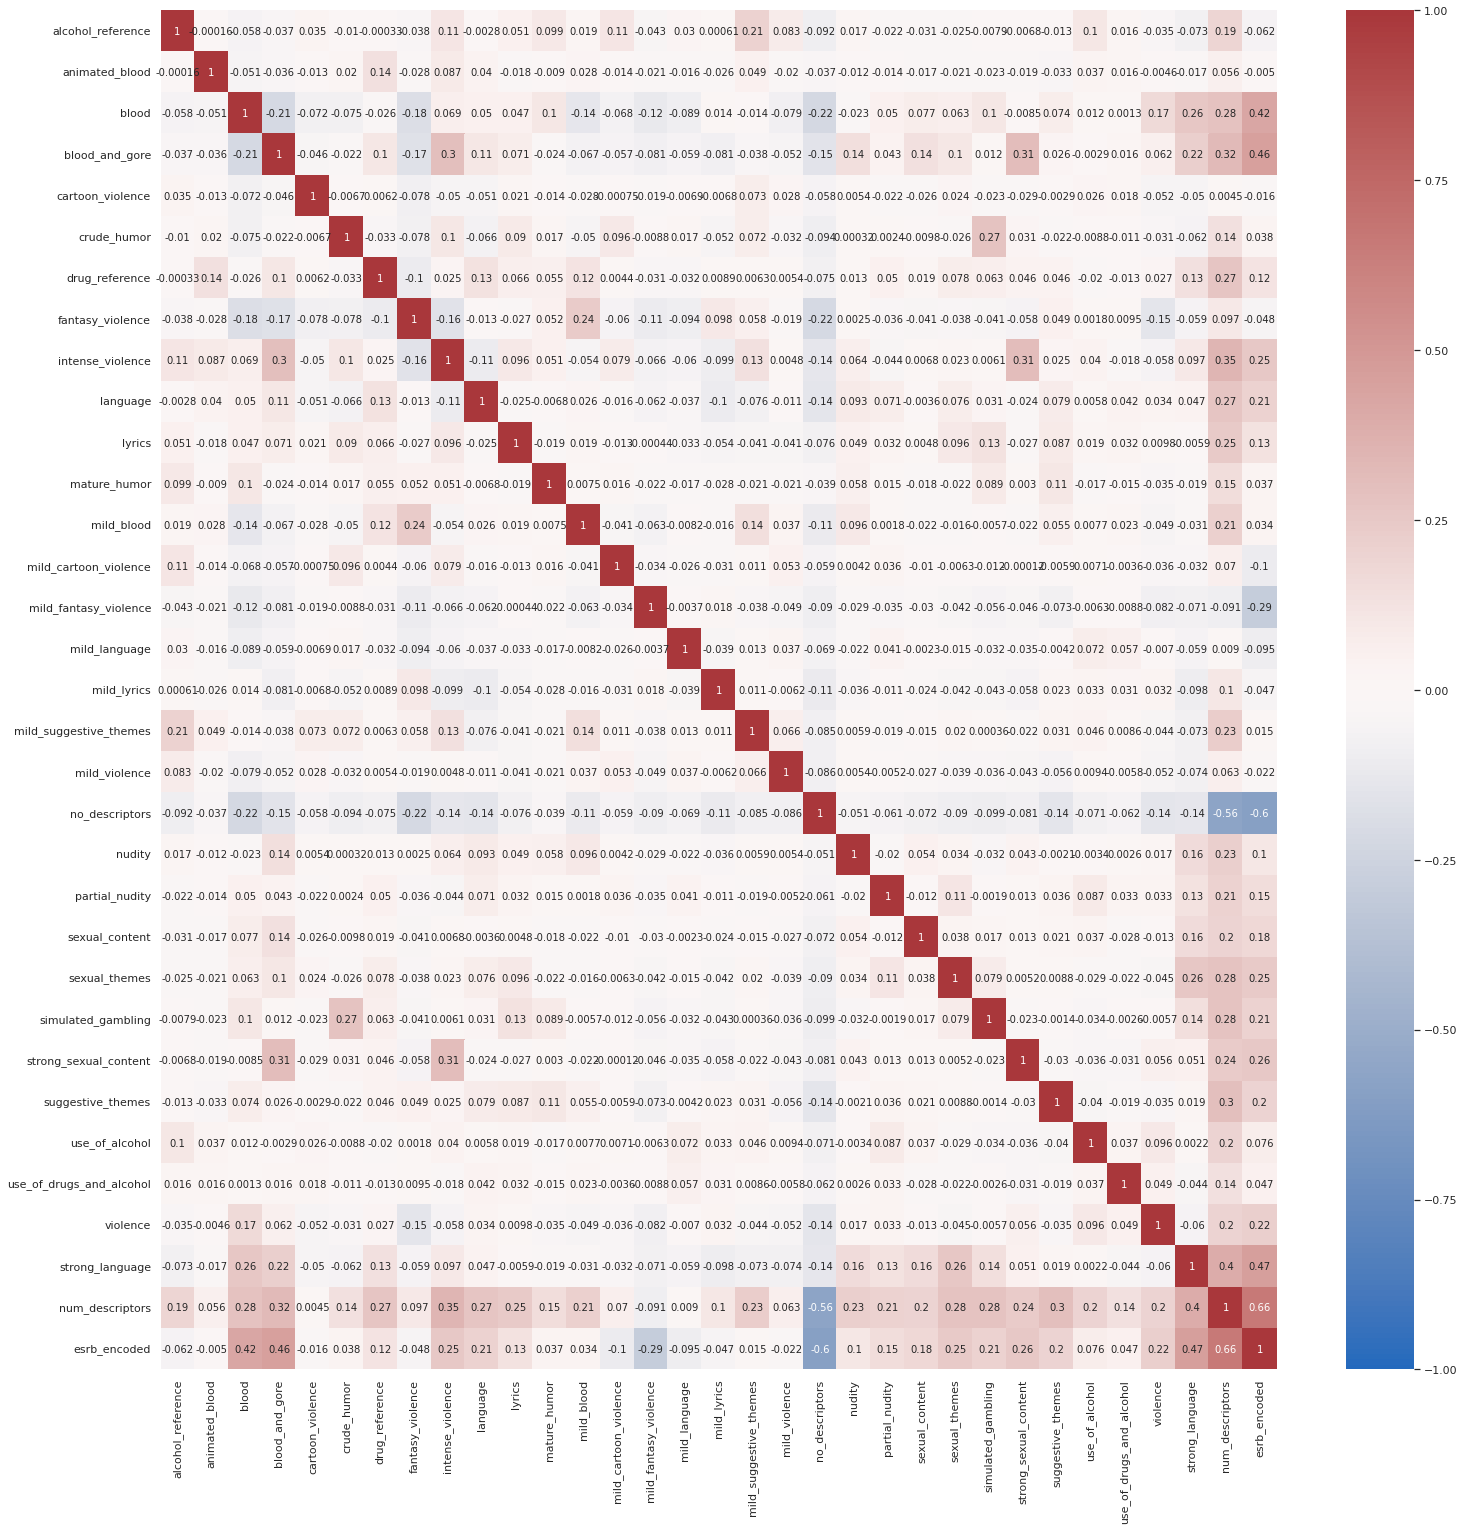

In [ ]:
plt.figure(figsize=(25, 25))

sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

We can see from the last row that
blood, bloodandgore, strong language and num_descriptors are correlated with a higher esrb score

And we can see that no_descriptor and mild fantasy violence are correlated with a lower score

Select

In [ ]:
list_descriptors = list(df.columns)



In [ ]:
list_descriptors.remove("title")
list_descriptors.remove("esrb_rating")
list_descriptors.remove("esrb_encoded")
list_descriptors.remove("no_descriptors")
list_descriptors.remove("num_descriptors")

In [ ]:
selected_features = list(df.columns)

In [ ]:
selected_features

['title',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'strong_language',
 'num_descriptors',
 'esrb_encoded']

In [ ]:
selected_features.remove("title")
selected_features.remove("esrb_rating")
selected_features.remove("esrb_encoded")

selected_features.remove("no_descriptors")
# removing this as
# num_descriptor is a better version of this
# and makes user input easier





In [ ]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'strong_language',
 'num_descriptors']

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])

Lenght of our Training data: 1889 
Length of our Testing data: 473


Build

We tried a couple of different models but the best was Random Forest
Also there is a project by someone who goes through 6 different models and also comes out with Random Forest as the best

After testing a random forest is best but I will build a decision tree just to show how the model works as it is related to Random forests

Hyper Parameter tuning did not help

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

y_pred_proba = model.predict_proba(X_test)


y_pred_proba = y_pred_proba[:,1]



Need different metrics for a multiclass classifier

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.74      0.81      0.77       104
           M       0.86      0.91      0.88        76
           T       0.84      0.78      0.81       180

    accuracy                           0.85       473
   macro avg       0.85      0.86      0.86       473
weighted avg       0.85      0.85      0.85       473



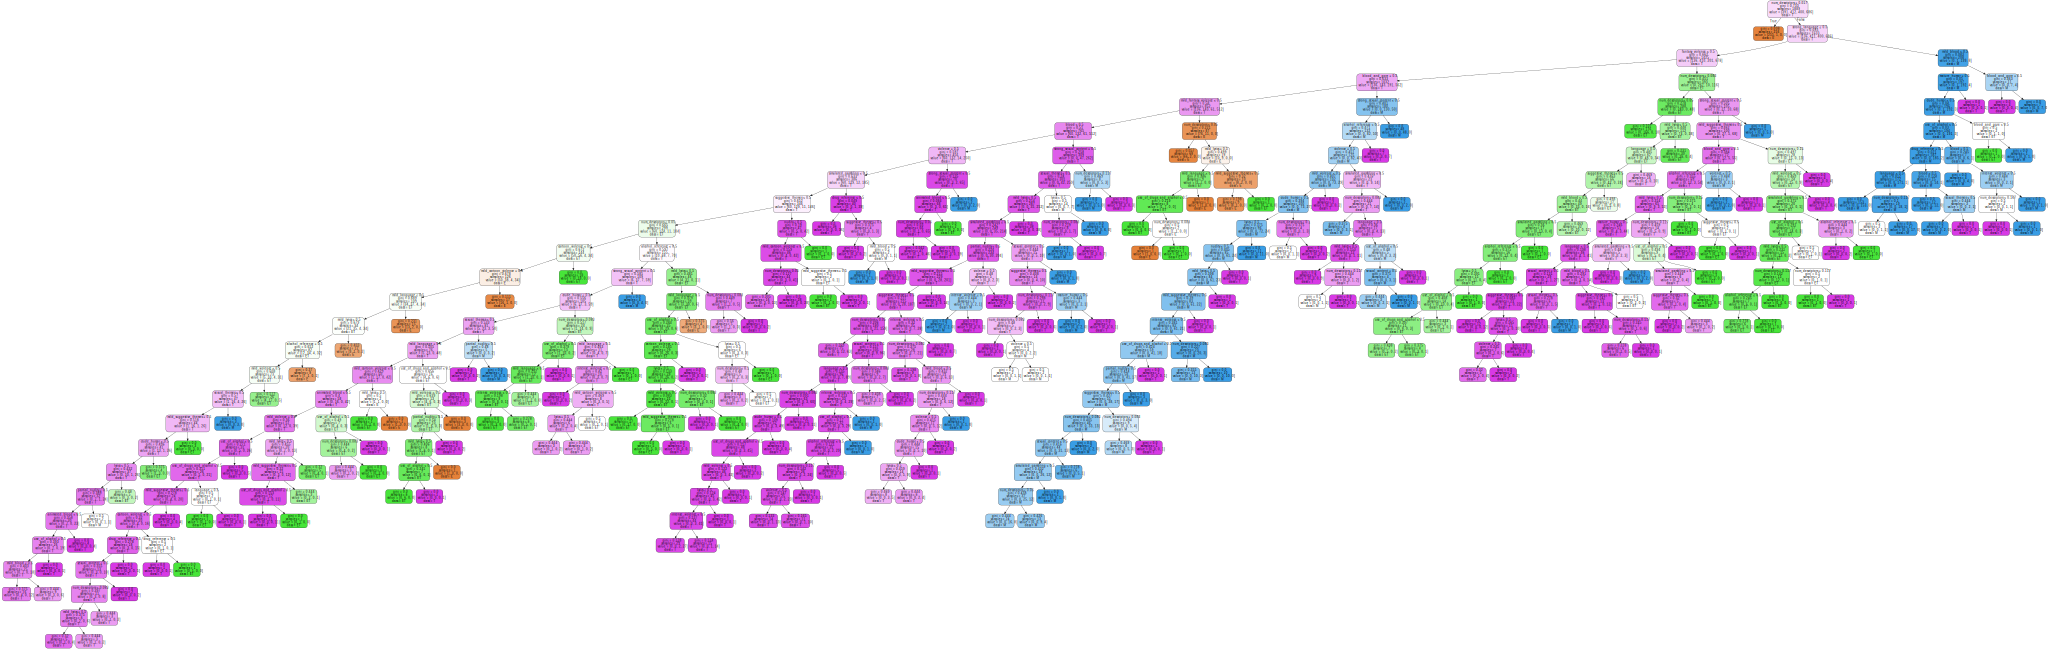

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

graph



In [ ]:
with open("tree.dot", "w") as f:
    f = tree.export_graphviz(model, out_file=f, 
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,  
                     special_characters=True)


Num_descriptors is the most important followed by strong language

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.301493,num_descriptors
29,0.147971,strong_language
7,0.097535,fantasy_violence
3,0.081265,blood_and_gore
14,0.073307,mild_fantasy_violence
2,0.033438,blood
24,0.025590,strong_sexual_content
16,0.022916,mild_lyrics
28,0.021795,violence
23,0.021425,simulated_gambling


Now I will build a Random Forest model which os the best of all the models I tried

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.81      0.79      0.80       104
           M       0.87      0.91      0.89        76
           T       0.85      0.85      0.85       180

    accuracy                           0.87       473
   macro avg       0.87      0.88      0.87       473
weighted avg       0.87      0.87      0.87       473



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


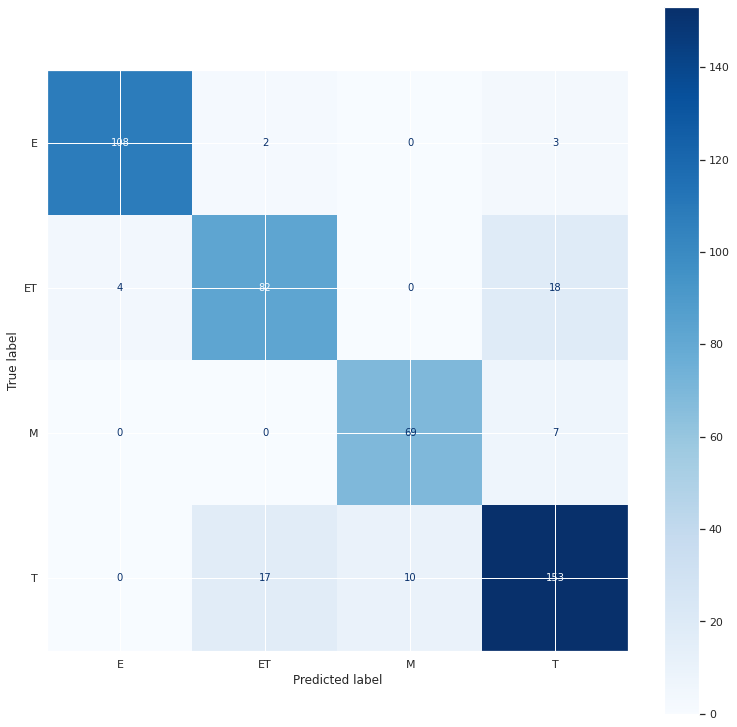

In [ ]:

print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.235983,num_descriptors
29,0.114272,strong_language
3,0.084073,blood_and_gore
7,0.083165,fantasy_violence
2,0.071190,blood
14,0.046709,mild_fantasy_violence
28,0.041624,violence
24,0.027043,strong_sexual_content
25,0.025437,suggestive_themes
9,0.022504,language


For the final Model we will train all of the data on the random Forest model

In [ ]:
final_model = RandomForestClassifier()

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

Training the data on the whole dataset and passing in the test set just to check the accuracy

This should be fine as even though the model has seen all the data games with the exact same descriptors can get different ratings 

In [ ]:
final_model.fit(X, y)

RandomForestClassifier()

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.86      0.86      0.86       104
           M       0.93      0.93      0.93        76
           T       0.90      0.90      0.90       180

    accuracy                           0.91       473
   macro avg       0.91      0.91      0.91       473
weighted avg       0.91      0.91      0.91       473



              precision    recall  f1-score   support

           E       0.97      0.98      0.97       504
          ET       0.86      0.89      0.87       516
           M       0.94      0.93      0.93       476
           T       0.90      0.89      0.90       866

    accuracy                           0.92      2362
   macro avg       0.92      0.92      0.92      2362
weighted avg       0.92      0.92      0.92      2362



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


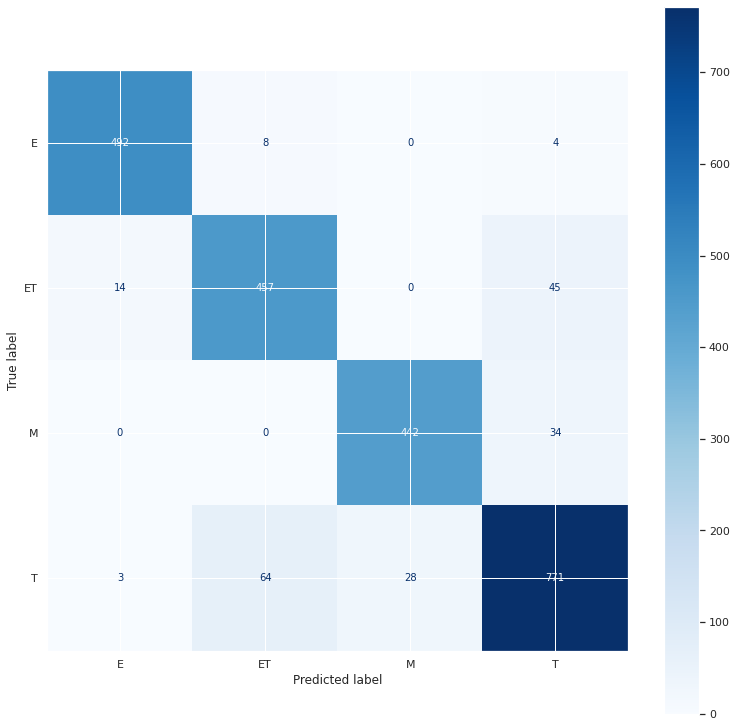

In [ ]:
y_pred = final_model.predict(X)
    
print(metrics.classification_report(y, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=final_model, 
                              X=X, 
                              y_true=y, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': final_model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.227503,num_descriptors
29,0.112884,strong_language
7,0.092054,fantasy_violence
3,0.084303,blood_and_gore
2,0.080635,blood
28,0.042768,violence
14,0.042000,mild_fantasy_violence
25,0.025580,suggestive_themes
9,0.023711,language
24,0.023080,strong_sexual_content


Training with all the data increased the accuracy to 91%

But this is an inflated value

In [ ]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'strong_language',
 'num_descriptors']

When asking for user input there are some redundant categories

In [ ]:
count = 0

new_game_values = []

for descriptor in selected_features:

  

  if (descriptor == "num_descriptors"):
    print()

  else:


    print("Does your game have", descriptor, "?")
    #answer = input("Enter y for yes and anything else for no:     ")

    # commented out for speed
    answer = "n"

    print("**********************************************************************")

    if(answer == "y"):
      new_game_values.append(1)

      count = count + 1

    else:
      new_game_values.append(0)




    
new_game_values.append(count/30)

# this works as it is the last feature

Does your game have alcohol_reference ?
**********************************************************************
Does your game have animated_blood ?
**********************************************************************
Does your game have blood ?
**********************************************************************
Does your game have blood_and_gore ?
**********************************************************************
Does your game have cartoon_violence ?
**********************************************************************
Does your game have crude_humor ?
**********************************************************************
Does your game have drug_reference ?
**********************************************************************
Does your game have fantasy_violence ?
**********************************************************************
Does your game have intense_violence ?
**********************************************************************
Does your game have language ?


In [ ]:
new_game_values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0]

In [ ]:
new_game_df = pd.DataFrame([new_game_values], columns=selected_features)

In [ ]:
new_game_df

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,strong_language,num_descriptors
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
y_pred = final_model.predict(new_game_df)

In [ ]:
y_pred

array(['E'], dtype=object)

In [ ]:
y_pred_proba = final_model.predict_proba(new_game_df)

In [ ]:
y_pred_proba

array([[0.99704153, 0.00295847, 0.        , 0.        ]])

Evaluate

At the end we have a model with an accuracy of about 87%

Is this perfect?
No.
But when it comes to subjective descriptors that are used in games I think this is a good start.

Is there a better way to classify games?

A K-means Clustering algorithm to try and see if there is a better way to do this

https://github.com/aadejare/new_esrb_rating/blob/main/new_esrb_rating.ipynb

Based on code from here which works on the same dataset

K Means Clustering

Based on same code

In [ ]:
df2 = pd.get_dummies(df, columns=['esrb_rating']).copy()

In [ ]:
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors,esrb_encoded
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,0,0.0,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,ET,0,0.1,1
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,M,1,0.1,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,ET,0,0.1,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,T,0,0.1,2


In [ ]:
ratings=['esrb_rating_E','esrb_rating_ET','esrb_rating_M','esrb_rating_T']

In [ ]:
X = df2[selected_features]

y = df2[ratings]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
from sklearn.cluster import KMeans

# maybe try hyper parameter tuning

# a bit difficlut to do since this is a blind algorithm

# 6 gives us very nice E and ET clusters

# 8 gives us a nice E and M cluster

# 10 gives us some decent E, ET an M clusters

# T is the hardest to cluster
# maybe because it is the most numerous
# also maybe because it is a bit of an edge category between ET and M
# maybe the dividing line is a bit more gray

In [ ]:
model = KMeans(n_clusters = 4, n_init = 10, max_iter = 300)

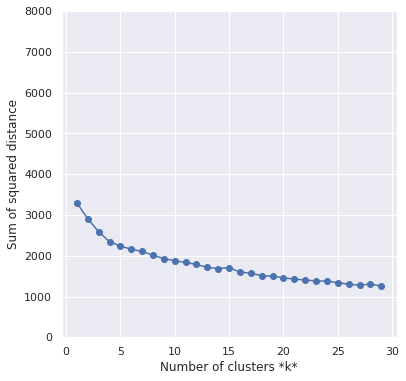

In [ ]:
sse = []
list_k = list(range(1, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.ylim(bottom = 0, top = 8000)
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# make axes start from 0

# takes a while to run

The more categories the better the clusters
Maybe we would be better with new data

In [ ]:
model.fit(X_train)

KMeans(n_clusters=4)

In [ ]:
rate_clust = y_train.copy()

In [ ]:
rate_clust = rate_clust.reset_index()
rate_clust['cluster'] = pd.Series(model.predict(X_train))

In [ ]:
rate_clust.head()

,index,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster
0,289,0,0,0,1,3
1,1883,0,0,1,0,2
2,1300,0,0,0,1,3
3,973,0,0,0,1,0
4,594,0,0,1,0,2


In [ ]:
rate_clust2 = pd.get_dummies(rate_clust, columns=['cluster']).copy()
rate_clust2.drop('index', axis=1).corr('spearman')

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster_0,cluster_1,cluster_2,cluster_3
esrb_rating_E,1.000000,-0.269830,-0.264798,-0.385800,0.492563,-0.261436,-0.178254,-0.227681
esrb_rating_ET,-0.269830,1.000000,-0.273742,-0.398830,-0.178369,0.573750,-0.180153,-0.235371
esrb_rating_M,-0.264798,-0.273742,1.000000,-0.391392,-0.164166,-0.230078,0.644007,-0.067186
esrb_rating_T,-0.385800,-0.398830,-0.391392,1.000000,-0.122333,-0.076973,-0.242238,0.451003
cluster_0,0.492563,-0.178369,-0.164166,-0.122333,1.000000,-0.530766,-0.361890,-0.462237
cluster_1,-0.261436,0.573750,-0.230078,-0.076973,-0.530766,1.000000,-0.178541,-0.228048
cluster_2,-0.178254,-0.180153,0.644007,-0.242238,-0.361890,-0.178541,1.000000,-0.155489
cluster_3,-0.227681,-0.235371,-0.067186,0.451003,-0.462237,-0.228048,-0.155489,1.000000


We have a decent E cluster but the rest leave some to be desired

I personally would not say that trying to reclassify how we rate games is the way to go.